<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2024-25

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav-2024

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 15th MAY @ 14:00**.

**Le Thanh Phuong Nam _ ID (HCMIU) : ITITWE19025 _ Student number (UWE): 23083609**

In [14]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from google.colab import files
import os

# Create part1 directory if it doesn't exist
os.makedirs('./part1', exist_ok=True)

# Upload packet-capture3.csv file
print("Upload file packet-capture3.csv:")
uploaded = files.upload()
# Move file to part1 directory
for file_name in uploaded.keys():
    if file_name == 'packet-capture3.csv':
        os.rename(file_name, './part1/packet-capture3.csv')

def load_csv_data():
    data = pd.read_csv('./part1/packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ]
data = data.drop('No.', axis=1)
data

Upload file packet-capture3.csv:


Saving packet-capture3.csv to packet-capture3.csv


,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling.

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

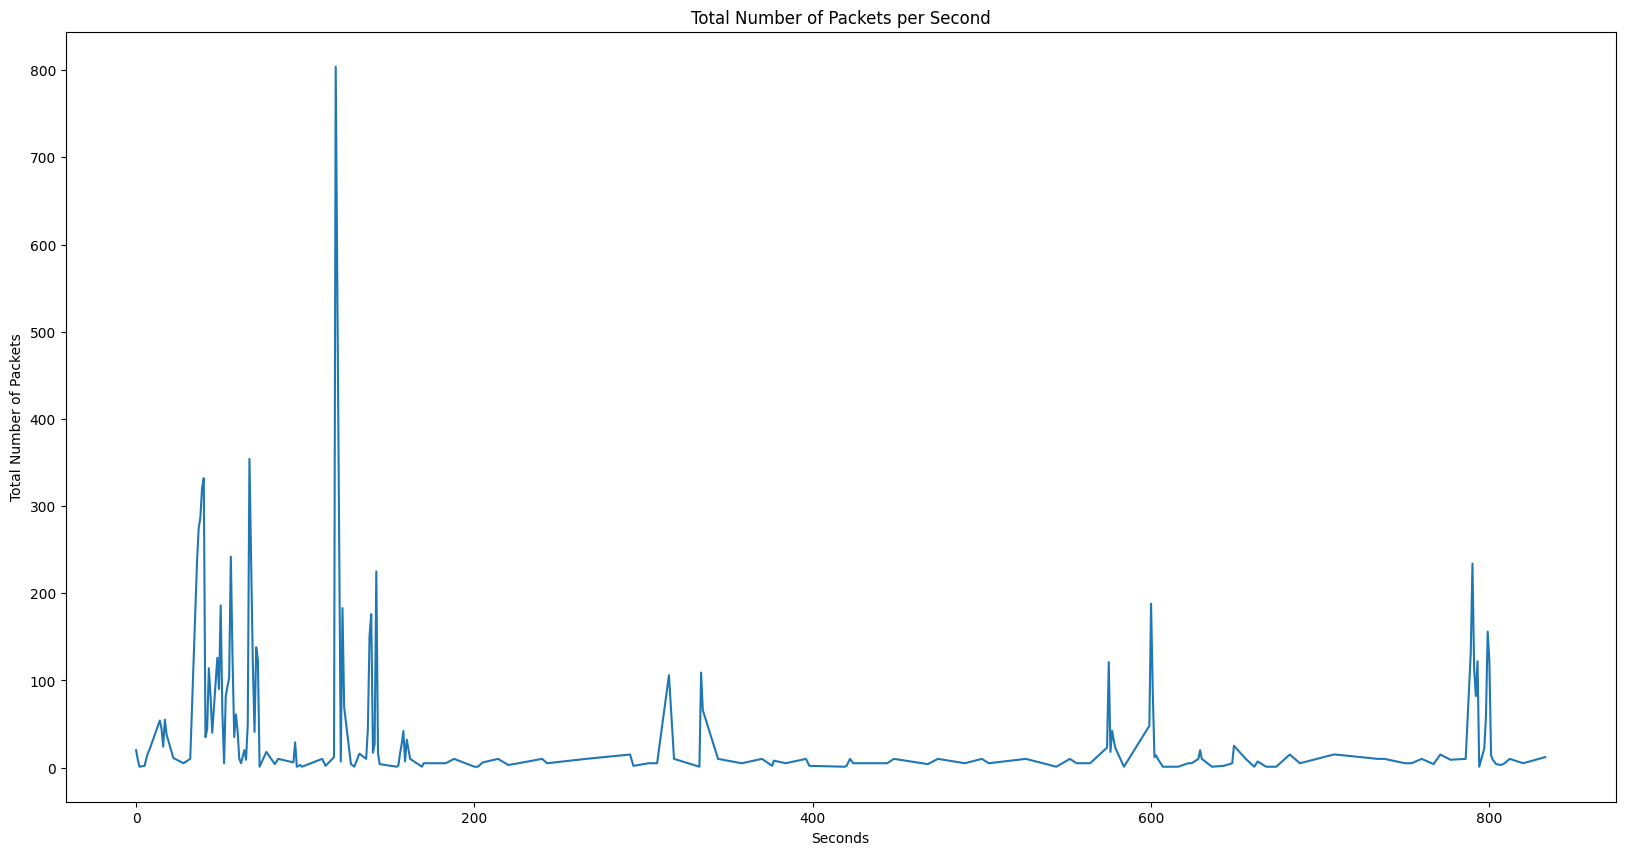

In [15]:
# ANSWER
plt.figure(figsize=(20,10))
# Convert Time column to seconds (round down to get integer seconds)
seconds = data['Time'].astype(int)
# Group by seconds and count
packets_per_second = data.groupby(seconds).size()
# Plot
plt.plot(packets_per_second.index, packets_per_second.values)
plt.xlabel('Seconds')
plt.ylabel('Total Number of Packets')
plt.title('Total Number of Packets per Second')
plt.show()

### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling.
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

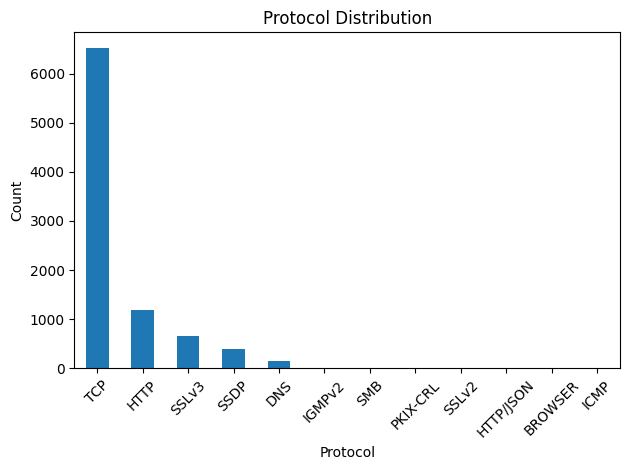

In [16]:
# ANSWER
data['Protocol'].value_counts().plot(kind='bar')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Protocol Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 3: Display a Scatter Chart that shows the association between Source and Destination data.

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

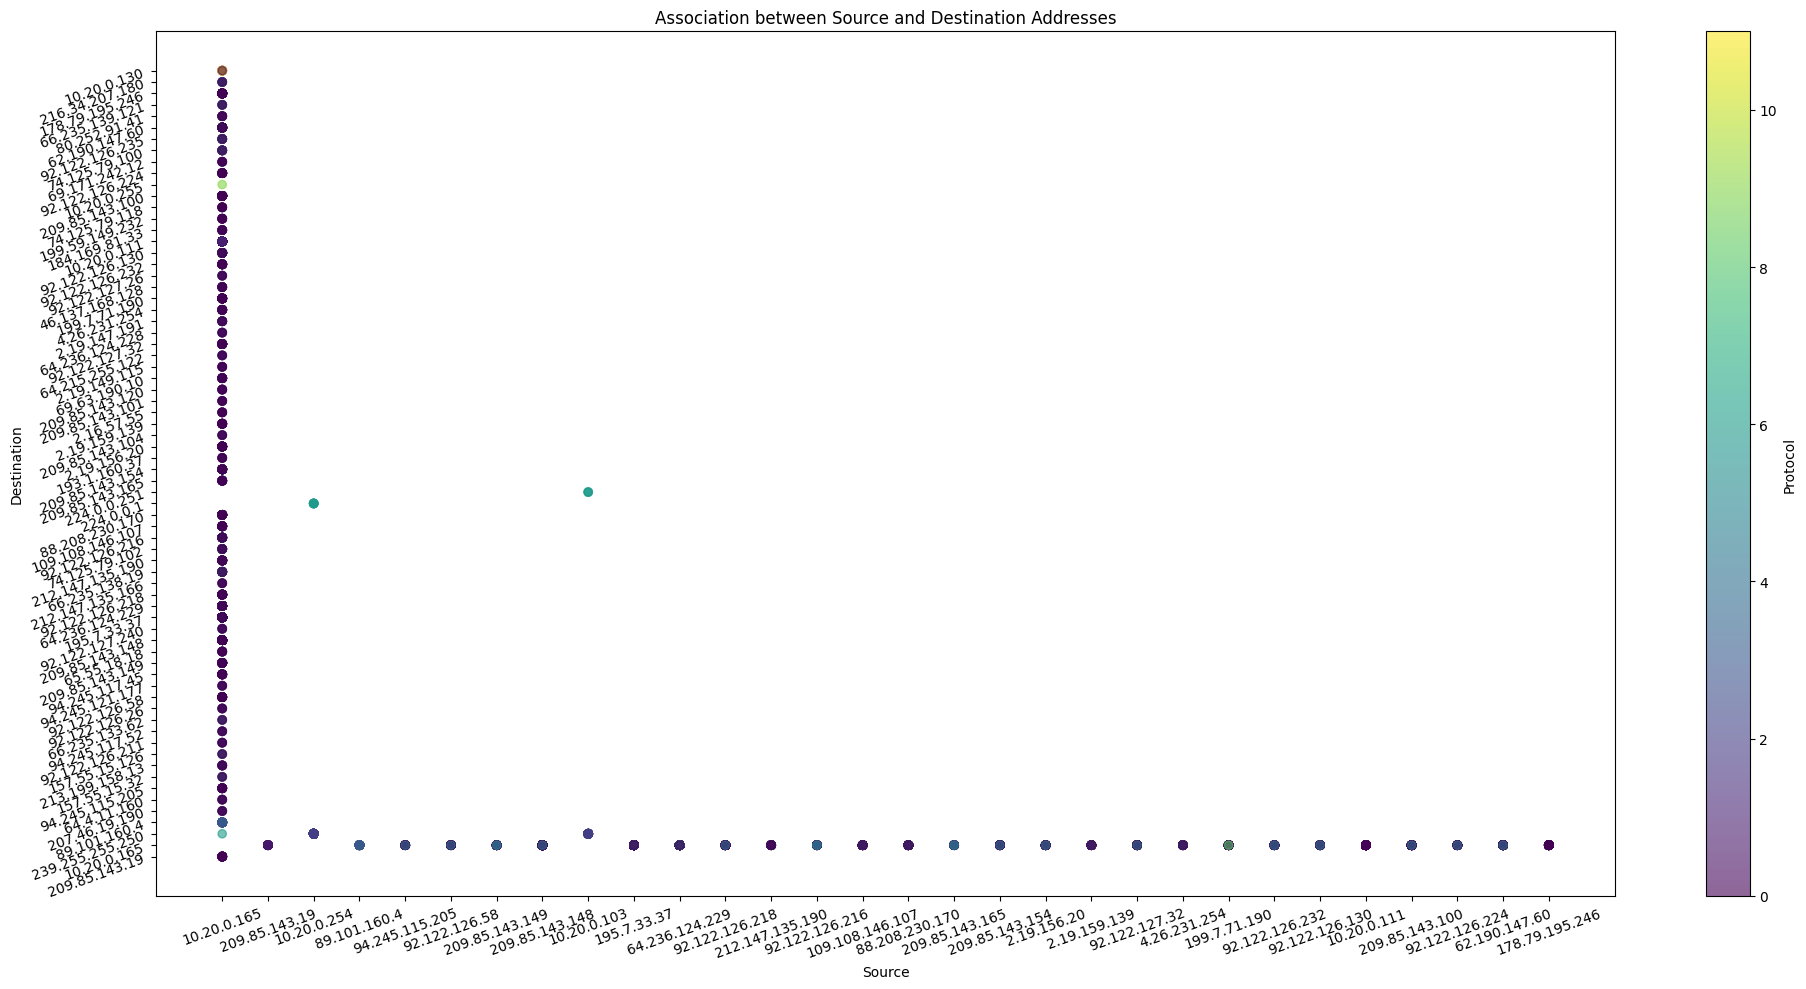

In [17]:
# ANSWER
plt.figure(figsize=(20,10))
plt.xticks(rotation=20)
plt.yticks(rotation=20)
protocols = data['Protocol'].unique()
protocol_to_num = {protocol: i for i, protocol in enumerate(protocols)}
colors = [protocol_to_num[protocol] for protocol in data['Protocol']]
scatter = plt.scatter(data["Source"], data["Destination"], c=colors, alpha=0.6, cmap='viridis')
# Add a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Protocol')
plt.title('Association between Source and Destination Addresses')
plt.xlabel('Source')
plt.ylabel('Destination')
plt.tight_layout()
plt.show()

### Question 4: Display the data as a node link diagram using Source and Destination as your edges.

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

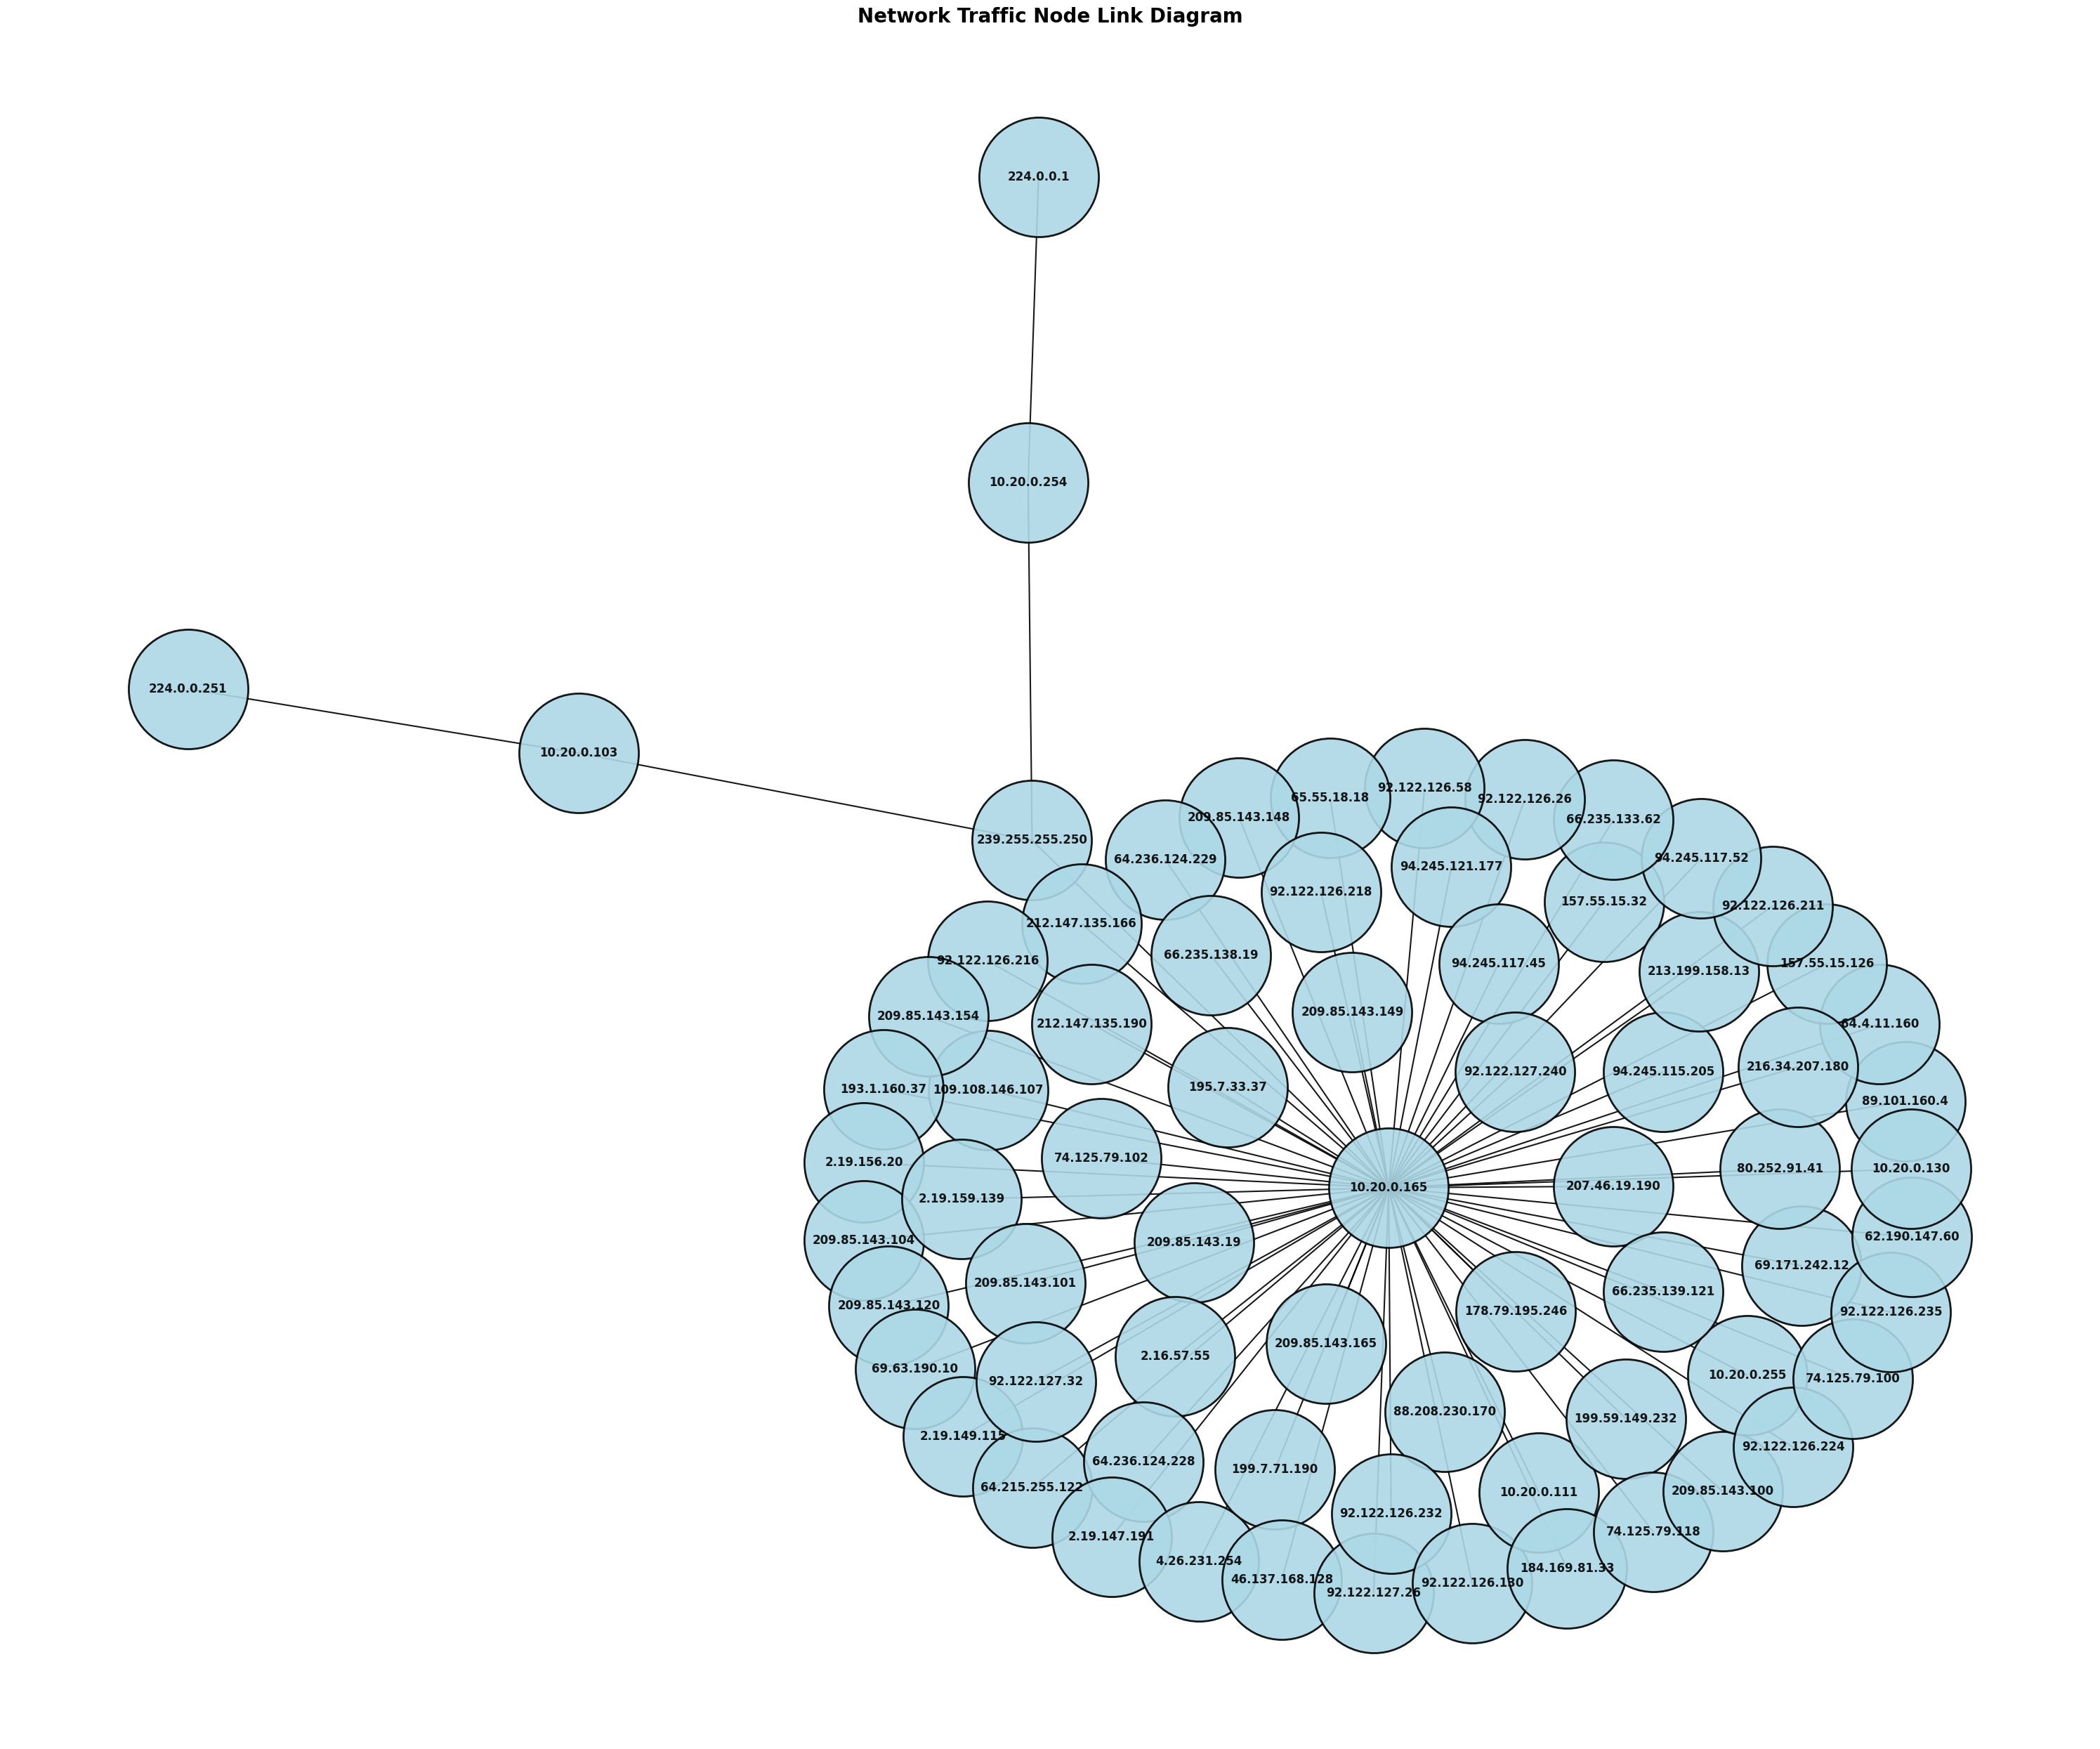

In [18]:
# ANSWER
plt.figure(figsize=(30,25))
G = nx.Graph()
G = nx.from_pandas_edgelist(data, source='Source', target='Destination')

pos = nx.kamada_kawai_layout(G)

options = {
    "pos": pos,
    "node_size": 15000,
    "node_color": "lightblue",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 1.5,
    "with_labels": True,
    "font_size": 12,
    "font_weight": "bold",
    "alpha": 0.9
}

nx.draw_networkx(G, **options)
plt.title('Network Traffic Node Link Diagram', fontsize=20, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [19]:
# Get unique protocols
protocols = data['Protocol'].unique()

# Create True/False columns for each protocol
for protocol in protocols:
    data[f'is_{protocol}'] = data['Protocol'] == protocol

# Check column names to verify
print("New columns created:")
protocol_columns = [col for col in data.columns if col.startswith('is_')]
print(protocol_columns)

# Display first few rows to verify
print("\nFirst 3 rows of the new columns:")
display(data[protocol_columns].head(3))

New columns created:
['is_TCP', 'is_SSLv3', 'is_SSDP', 'is_DNS', 'is_HTTP', 'is_HTTP/JSON', 'is_IGMPv2', 'is_SSLv2', 'is_PKIX-CRL', 'is_BROWSER', 'is_ICMP', 'is_SMB']

First 3 rows of the new columns:


,is_TCP,is_SSLv3,is_SSDP,is_DNS,is_HTTP,is_HTTP/JSON,is_IGMPv2,is_SSLv2,is_PKIX-CRL,is_BROWSER,is_ICMP,is_SMB
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False


### Question 6: Show a Multi-Line Chart that shows the Total Number of Packets Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol.

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

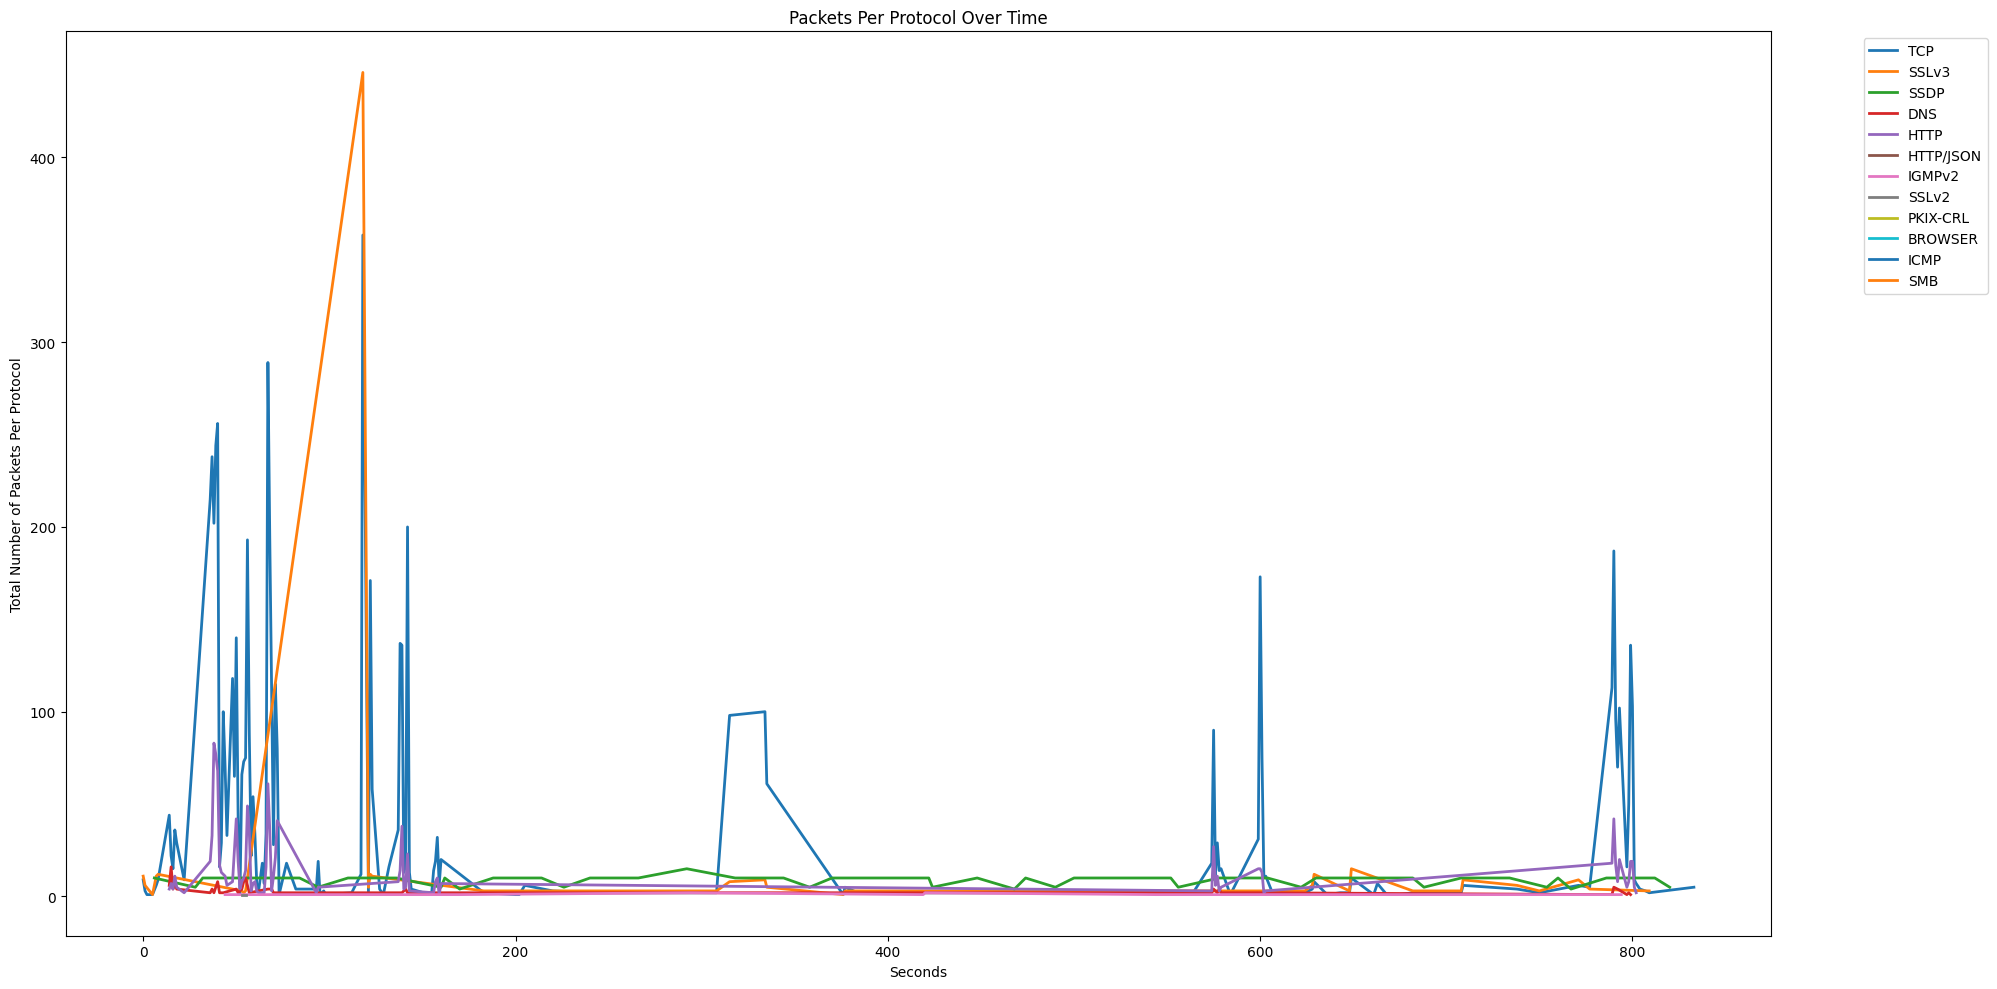

In [20]:
# ANSWER
plt.figure(figsize=(20,10))

# Get unique protocols
protocols = data['Protocol'].unique()

# For each protocol
for protocol in protocols:
    # Filter data by protocol
    protocol_data = data[data['Protocol'] == protocol]
    # Convert Time column to seconds (round down to get integer seconds)
    seconds = protocol_data['Time'].astype(int)
    # Group by seconds and count
    packets_per_second = protocol_data.groupby(seconds).size()
    # Plot for this protocol
    plt.plot(packets_per_second.index, packets_per_second.values, label=protocol, linewidth=2)

plt.xlabel('Seconds')
plt.ylabel('Total Number of Packets Per Protocol')
plt.title('Packets Per Protocol Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

**Answer:**

Different visualization elements reveal key findings about security insights:

Temporal Analysis (Chart in Q1): The activity at seconds 80 and 680 surpasses 800 and 200 packets, respectively, which can indicate DDoS attacks and automated port scans.

Protocol Distribution (Chart in Q2): TCP dominates the network activity with approximately 6,400 packets while HTTP and SSLv3 follow behind. This illustrates potential cyber command responsibility (C2) operations or secret data transfer issues.

Source-Destination Mapping (Chart in Q3): The source-destination pair interactions on the scatterplot appear concentrated, which suggests that communication was directed, unlike general random data transfer.

Network Topology (Chart in Q4): A hub-and-spoke structure identifies 10.20.0.165 as a central node because this node seems compromised while performing lateral movement.

Boolean Protocol Flags (Table in Q5): New columns monitor protocol activity per record which aids in detecting multiple protocol attacks.

Protocol Timeline (Chart in Q6): The theory of encrypted malicious traffic during abnormal activity windows receives additional support from TCP and SSL peaks that match over time frames.

Conclusion: IP 10.20.0.165 must be investigated immediately to prevent additional damage, as the protocol shows signs of being involved in risky actions.